In [21]:
import numpy as np
import matplotlib.pyplot as plt
import struct

# Load MNIST-files into numpy arrays
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

## Load the test images

In [22]:
X_test = read_idx('t10k-images.idx3-ubyte')
y_test = read_idx('t10k-labels.idx1-ubyte')

# Scale the grayscale values [0, 255] into [0, 1]
X_test = X_test.astype('float32')
X_test /= 255
X_test = X_test.reshape(10000, 784)

# Convert the target values into a "one hot" array,
# for axample: 4 -> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Y_test = np.zeros((10000, 10))
for k in range(0, 10000):
    Y_test[k, y_test[k]] = 1

## Load the trained coefficient matrices

In [23]:
W1 = np.load('W1.npy')
W2 = np.load('W2.npy')
W3 = np.load('W3.npy')

# Choose an image

In [24]:
n = 18  # <= Change this to choose a test image [0, 9999]

# Recognize the image using the trained network

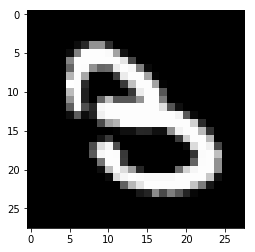

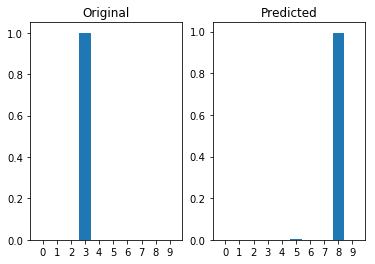

In [25]:
# This is the Complete Neural Network Forward Pass

A1 = np.append(1, X_test[n, :]).reshape((785, 1))
A2 = np.append(1, sigmoid(np.dot(W1, A1))).reshape((17, 1))
A3 = np.append(1, sigmoid(np.dot(W2, A2))).reshape((17, 1))
A4 = sigmoid(np.dot(W3, A3))


# Compare the prediction with the correct label

Y = Y_test[n, :].reshape((10, 1))

plt.figure(1)
image = X_test[n, :].reshape(28, 28)
plt.imshow(image, cmap='gray')
    
plt.figure(2)
ind = np.arange(0, 10)
plt.subplot(1, 2, 1)
plt.bar(ind, Y.flatten())
plt.xticks(range(10))
plt.title('Original')
    
plt.subplot(1, 2, 2)
plt.bar(ind, A4.flatten())
plt.xticks(range(10))
plt.title('Predicted')
   
plt.show()